##4.2 - Sentiment text classification using keras with LSTM

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Mentoria-Financiera-DiploDatos/Entrega3/master/sentimientos/data/feeling_procesado.csv")
print(df.news.size)
df.head(3)

4838


,Unnamed: 0,feeling,news,news_tokens,news_tokens_tagged
0,0,neutral,"According to Gran , the company has no plans t...","['accord', 'gran', 'company', 'plan', 'move', ...","[('accord', 'NN'), ('gran', 'VBD'), ('company'..."
1,1,neutral,Technopolis plans to develop in stages an area...,"['technopolis', 'plan', 'develop', 'stage', 'a...","[('technopolis', 'NN'), ('plan', 'NN'), ('deve..."
2,2,negative,The international electronic industry company ...,"['international', 'electronic', 'industry', 'c...","[('international', 'JJ'), ('electronic', 'JJ')..."


In [ ]:
#select relavant columns
news_df = df[['news','feeling']]
news_df.head(10)

,news,feeling
0,"According to Gran , the company has no plans t...",neutral
1,Technopolis plans to develop in stages an area...,neutral
2,The international electronic industry company ...,negative
3,With the new production plant the company woul...,positive
4,According to the company 's updated strategy f...,positive
5,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,positive
6,"For the last quarter of 2010 , Componenta 's n...",positive
7,"In the third quarter of 2010 , net sales incre...",positive
8,Operating profit rose to EUR 13.1 mn from EUR ...,positive
9,"Operating profit totalled EUR 21.1 mn , up fro...",positive


In [ ]:
# No tenemos en cuenta las noticias etiquetadas como neutrales
news_df = news_df[news_df['feeling'] != 'neutral'].reset_index(drop=True)

# Mezclamos con sample ya que los sentimientos están bastante agrupados en el
# dataset y esto genera problemas luego a la hora de entrenar el modelo.
news_df = news_df.sample(frac=1).reset_index(drop=True)
print(news_df.feeling.size)
news_df.head(10)

1966


,news,feeling
0,- Demand for fireplace products was lower than...,negative
1,The layoffs were aimed at reaching an annual s...,positive
2,Pretax loss totalled EUR 162.3 mn compared to ...,negative
3,Pretax profit jumped to EUR 21.9 million from ...,positive
4,The price for logs has clearly improved from 2...,positive
5,`` QPR 8 integrated management system is the f...,positive
6,Revenue in the quarter fell 8 percent to ( EUR...,negative
7,HELSINKI Thomson Financial - Shares closed lit...,negative
8,Net cash flow from operating activities was a ...,negative
9,"Stora Enso Oyj , the largest papermaker , in O...",negative


In [ ]:
# convert feeling to numeric
sentiment_label = news_df.feeling.factorize()
sentiment_label

(array([0, 1, 0, ..., 1, 1, 1]),
 Index(['negative', 'positive'], dtype='object'))

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

news = news_df.news.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(news)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(news)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
print(vocab_size)
# 4088 palabras con las noticias preprocesadas
# 5535 palabras con las noticias sin el preprocesado

5535


In [ ]:
print(tokenizer.word_index)

{'the': 1, 'in': 2, 'of': 3, 'to': 4, 'and': 5, 'eur': 6, 'a': 7, 'from': 8, 'for': 9, 'mn': 10, "'s": 11, 'profit': 12, 'company': 13, 'its': 14, 'year': 15, 'said': 16, 'finnish': 17, '1': 18, 'net': 19, 'by': 20, 'sales': 21, 'on': 22, 'has': 23, 'will': 24, 'million': 25, 'with': 26, '2': 27, '5': 28, 'period': 29, 'm': 30, '3': 31, 'operating': 32, 'it': 33, 'is': 34, 'quarter': 35, '0': 36, 'mln': 37, '2009': 38, '4': 39, 'that': 40, 'at': 41, 'as': 42, '6': 43, 'was': 44, '2008': 45, '8': 46, '9': 47, '7': 48, '2010': 49, 'oyj': 50, '2007': 51, 'loss': 52, 'be': 53, 'compared': 54, 'first': 55, 'group': 56, 'an': 57, 'finland': 58, 'up': 59, "''": 60, 'corresponding': 61, 'euro': 62, 'increased': 63, '2006': 64, 'share': 65, 'rose': 66, 'are': 67, 'have': 68, 'today': 69, 'market': 70, '000': 71, 'new': 72, 'percent': 73, 'which': 74, 'down': 75, 'also': 76, 'hel': 77, '2005': 78, 'per': 79, 'increase': 80, 'this': 81, 'been': 82, 'business': 83, 'contract': 84, 'services': 85, 

In [ ]:
print(news[0])
print(encoded_docs[0])

- Demand for fireplace products was lower than expected , especially in Germany .
[211, 9, 1400, 115, 44, 165, 87, 135, 856, 2, 857]


In [ ]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0  211    9 1400  115   44  165   87
  135 

In [ ]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 200, 32)           177120    
_________________________________________________________________
spatial_dropout1d_12 (Spatia (None, 200, 32)           0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)                16600     
_________________________________________________________________
dropout_12 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 51        
Total params: 193,771
Trainable params: 193,771
Non-trainable params: 0
_________________________________________________________________
None


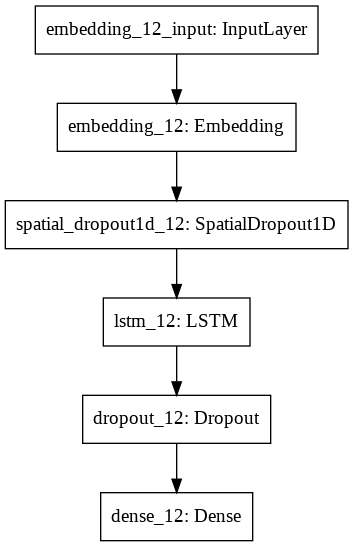

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=8, batch_size=32)

Epoch 1/8
50/50 [==============================] - 14s 234ms/step - loss: 0.6398 - accuracy: 0.6838 - val_loss: 0.5979 - val_accuracy: 0.7081
Epoch 2/8
50/50 [==============================] - 11s 227ms/step - loss: 0.5904 - accuracy: 0.6889 - val_loss: 0.5268 - val_accuracy: 0.7107
Epoch 3/8
50/50 [==============================] - 11s 226ms/step - loss: 0.5232 - accuracy: 0.7805 - val_loss: 0.5524 - val_accuracy: 0.7386
Epoch 4/8
50/50 [==============================] - 11s 227ms/step - loss: 0.4026 - accuracy: 0.8422 - val_loss: 0.3837 - val_accuracy: 0.8325
Epoch 5/8
50/50 [==============================] - 11s 227ms/step - loss: 0.2739 - accuracy: 0.9071 - val_loss: 0.3748 - val_accuracy: 0.8249
Epoch 6/8
50/50 [==============================] - 11s 227ms/step - loss: 0.2042 - accuracy: 0.9383 - val_loss: 0.3425 - val_accuracy: 0.8680
Epoch 7/8
50/50 [==============================] - 11s 227ms/step - loss: 0.1672 - accuracy: 0.9485 - val_loss: 0.3349 - val_accuracy: 0.8579
Epoch 

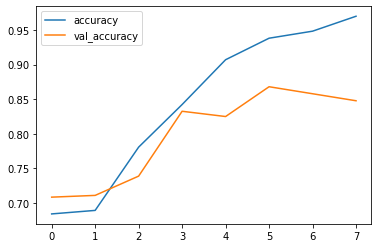

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

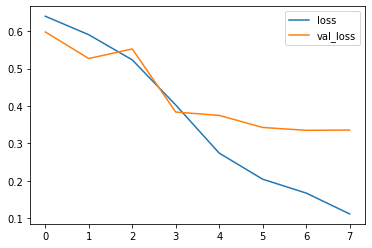

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
test_word ="This is bad, negative, a tax, horrible. Please classify me as negative!"
tw = tokenizer.texts_to_sequences([test_word])
tw

[[81, 34, 2722, 332, 7, 474, 42, 332, 421, 528, 2647]]

In [ ]:
tw = pad_sequences(tw,maxlen=200)
tw

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [ ]:
prediction = int(model.predict(tw).round().item())

In [ ]:
sentiment_label[1][prediction]

'negative'

##Conclusión

El modelo resultante obtenido usando redes neuronales con keras es significativamente mejor que el obtenido con los algoritmos simples de ML que utilizamos en la entrega 3.

**Enlace de referencia:**

Práctico: https://medium.datadriveninvestor.com/deep-learning-lstm-for-sentiment-analysis-in-tensorflow-with-keras-api-92e62cde7626

Explicación LSTM: https://medium.com/mlearning-ai/sentiment-analysis-using-lstm-21767a130857
